In [14]:
import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn import cluster
from random import randint

In [48]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [23]:
path_data = "../../data"

filename_entete = "entete.csv"
filename_client = "client.csv"

# équivalent à path_data + filename_meteo et s'assure que le path est de la bonne forme
path_data_entete = os.path.join(path_data, filename_entete)
path_data_client = os.path.join(path_data, filename_client)
# affiche le chemin path_data_meteo
print(path_data_entete)
print(path_data_client)

../../data/entete.csv
../../data/client.csv


In [39]:
df_entete = pd.read_csv(path_data_entete, sep=",")

df_entete["CodeClient"] = df_entete["CodeClient"].astype(str)

df_entete.dtypes

CdeNumCom        object
TypCde           object
CodeClient       object
DateCreation     object
Gestionnaire     object
CAHT            float64
Transfo          object
dtype: object

In [78]:
df_client = pd.read_csv(path_data_client, sep=",")

df_client["CodeClient"] = df_client["CodeClient"].astype(str)

df_client

,CodeClient,DateCreation,SecteurCo,SecteurAct,NivSupp1,NivSupp2
0,1,10/4/2012,1.0,DIVERS,NaN,NaN
1,2,11/2/2011,40.0,N,G1047,G0021
2,3,12/20/2012,0.0,DIVERS,NaN,NaN
3,5,11/2/2011,70.0,FAB,NaN,NaN
4,9,11/2/2011,40.0,N,G1079,G0052
...,...,...,...,...,...,...
10103,G1137,5/13/2020,91.0,N,NaN,NaN
10104,G1138,2/23/2021,NaN,NaN,G0002,NaN
10105,G1139,6/8/2021,NaN,NaN,G0071,NaN
10106,P-TES,3/12/2020,91.0,NaN,NaN,NaN


In [65]:
df_frequence = df_entete.groupby(
    by=['CodeClient'], as_index=False
)['DateCreation'].count()

df_frequence.columns = ['CodeClient', 'Frequence']

df_frequence = pd.merge(df_frequence, df_client, how = 'inner', on = 'CodeClient')[{"CodeClient", "Frequence", "SecteurAct"}]

In [66]:
df_frequence

,CodeClient,SecteurAct,Frequence
0,1,DIVERS,43
1,100,N,2
2,10004,N,15
3,10005,N,10
4,10007,FEN,6
...,...,...,...
4533,9982,N,13
4534,9986,FEN,1
4535,9988,FEN,46
4536,9997,FAB,10


In [72]:
df_frequence["SecteurAct"] = df_frequence["SecteurAct"].astype(str)
df_frequence["Frequence"] = df_frequence["Frequence"].astype(int)

<AxesSubplot:xlabel='SecteurAct', ylabel='Frequence'>

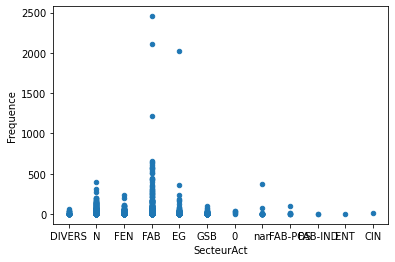

In [73]:
df_frequence.plot(x="SecteurAct", y="Frequence", kind="scatter")

<AxesSubplot:xlabel='SecteurAct'>

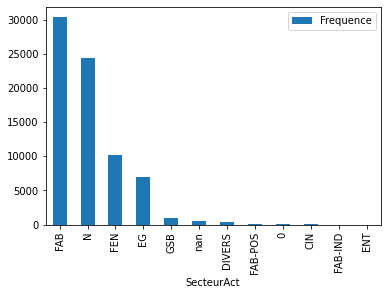

In [77]:
df_frequence = df_frequence.groupby("SecteurAct")["Frequence"].sum().reset_index()

df_frequence = df_frequence.sort_values('Frequence', ascending=False)

df_frequence.plot(x="SecteurAct", y="Frequence", kind="bar")